In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.core.display import display
from sklearn.model_selection import train_test_split
%matplotlib inline

from skimage import io
import os

paths = [f'./images/{path}' for path in os.listdir('./images/')]
#     io.imread(f'./images/{path}')

# file = io.imread(f'./images/2013_03_01_00_00_00.jpg')


In [2]:
paths.sort()
paths

['./images/2013_01_01_00_00_00.jpg',
 './images/2013_01_01_12_00_00.jpg',
 './images/2013_01_02_00_00_00.jpg',
 './images/2013_01_02_12_00_00.jpg',
 './images/2013_01_03_00_00_00.jpg',
 './images/2013_01_03_12_00_00.jpg',
 './images/2013_01_04_00_00_00.jpg',
 './images/2013_01_04_12_00_00.jpg',
 './images/2013_01_05_00_00_00.jpg',
 './images/2013_01_05_12_00_00.jpg',
 './images/2013_01_06_00_00_00.jpg',
 './images/2013_01_06_12_00_00.jpg',
 './images/2013_01_07_00_00_00.jpg',
 './images/2013_01_07_12_00_00.jpg',
 './images/2013_01_08_00_00_00.jpg',
 './images/2013_01_08_12_00_00.jpg',
 './images/2013_01_09_00_00_00.jpg',
 './images/2013_01_09_12_00_00.jpg',
 './images/2013_01_10_00_00_00.jpg',
 './images/2013_01_10_12_00_00.jpg',
 './images/2013_01_11_00_00_00.jpg',
 './images/2013_01_11_12_00_00.jpg',
 './images/2013_01_12_00_00_00.jpg',
 './images/2013_01_12_12_00_00.jpg',
 './images/2013_01_13_00_00_00.jpg',
 './images/2013_01_13_12_00_00.jpg',
 './images/2013_01_14_00_00_00.jpg',
 

In [3]:
images = io.imread_collection(paths, conserve_memory=False)

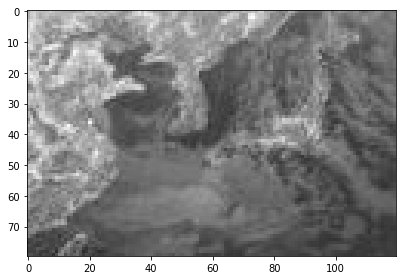

In [4]:
io.imshow(images[9])

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

data = [image.ravel()/255. for image in images]

tsne = tsne.fit_transform(data)

KeyboardInterrupt: 

In [74]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=30, random_state=0)

image_shape = images[0].shape

# nmf.fit(images)

In [75]:
data = [image.ravel()/255. for image in images]

In [76]:
nmf.fit(data)
data_nmf = nmf.transform(data)

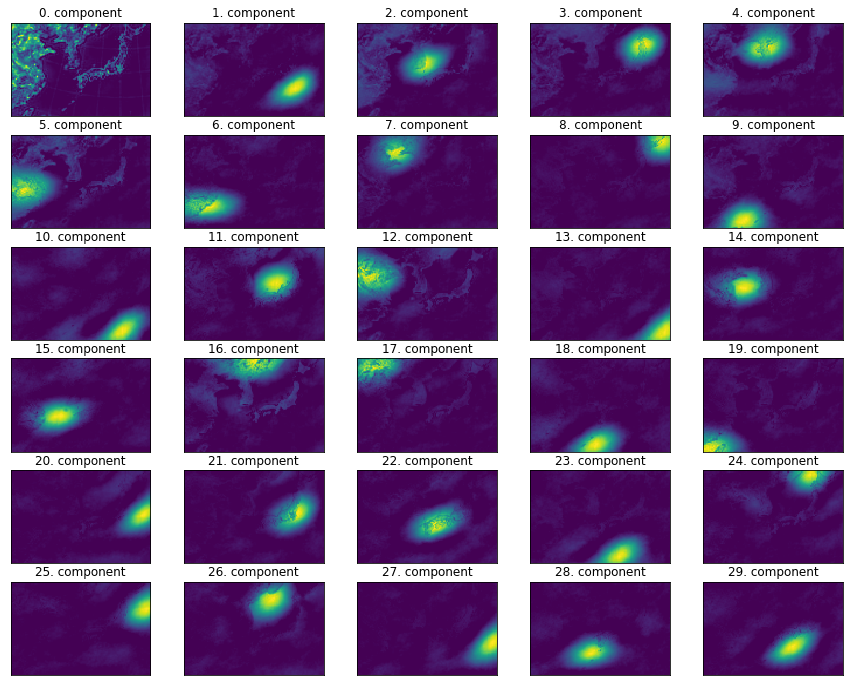

In [77]:
fix, axes = plt.subplots(6, 5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component,ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

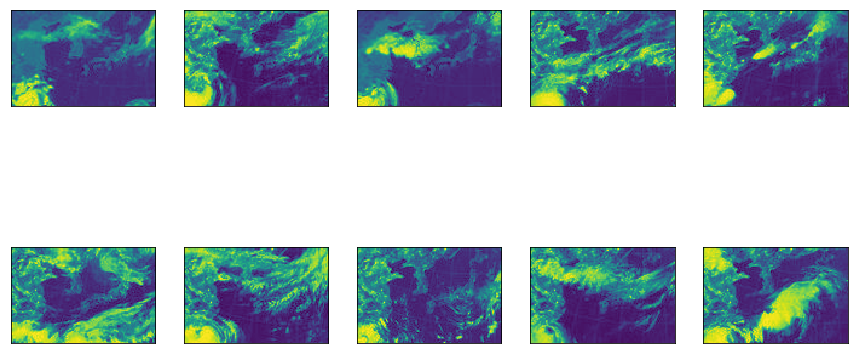

In [80]:
def draw_top_rates(compn):
    inds = np.argsort(data_nmf[:, compn])[::-1]
    fix, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})

    for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
        ax.imshow(data[ind].reshape(image_shape))

draw_top_rates(19)

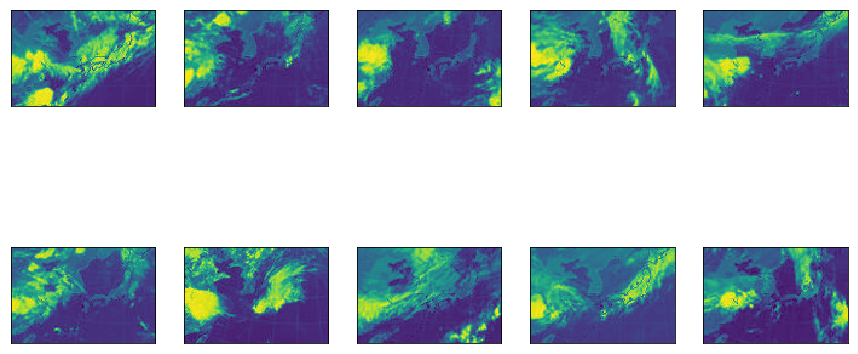

In [10]:
draw_top_rates(5)

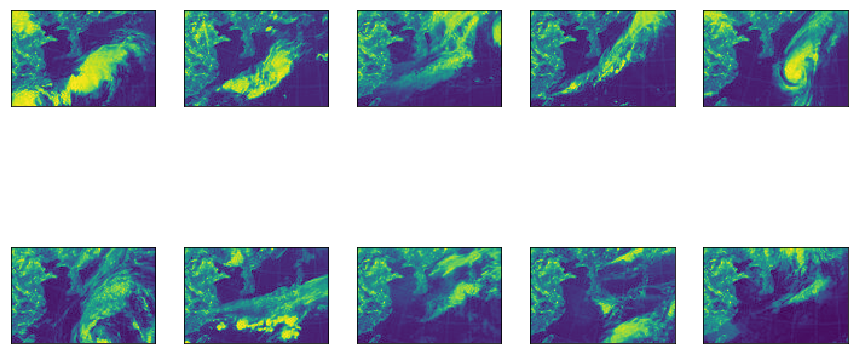

In [11]:
draw_top_rates(0)

In [9]:
rains = pd.read_csv('./data/is_rainy.csv', header=None)
rains = [1 if rain else 0 for rain in rains[0]]


X_train, X_test, y_train, y_test = train_test_split(data_nmf, rains, random_state=0)

NameError: name 'data_nmf' is not defined

In [100]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC()
model.fit(X_train_scaled, y_train)

print( model.score(X_test_scaled, y_test) )

0.7221223021582733


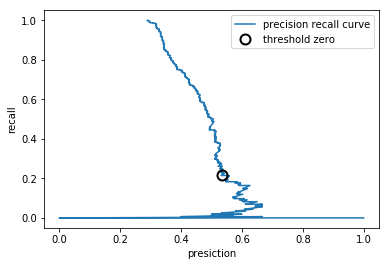

In [101]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, model.decision_function(X_test_scaled))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

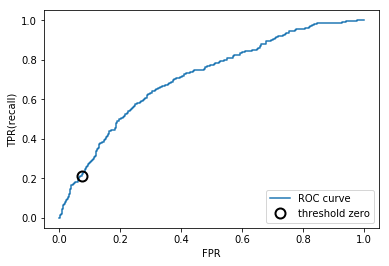

In [102]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test_scaled))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.1, max_depth=6, random_state=32)
model.fit(X_train, y_train)

print( model.score(X_test, y_test) )

0.7338129496402878


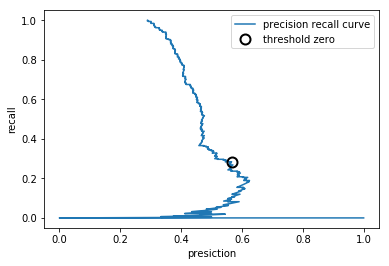

In [79]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, model.decision_function(X_test))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

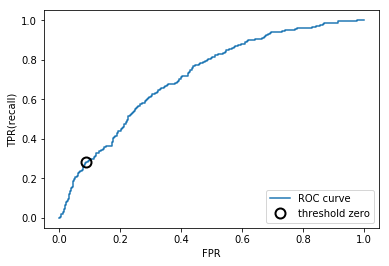

In [80]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [50]:
from sklearn.metrics import confusion_matrix
X_pred = model.predict(X_test)
print(confusion_matrix(y_test, X_pred))

[[723  72]
 [235  82]]


In [81]:
from sklearn.metrics import classification_report

X_pred = model.predict(X_test)

print(classification_report(y_test, X_pred))

             precision    recall  f1-score   support

          0       0.76      0.91      0.83       795
          1       0.57      0.28      0.38       317

avg / total       0.71      0.73      0.70      1112



In [87]:
X_pred_low_thres = model.predict_proba(X_test)[:,1] > 0.5
print(classification_report(y_test, X_pred_low_thres))
print(confusion_matrix(y_test, X_pred_low_thres))

             precision    recall  f1-score   support

          0       0.76      0.91      0.83       795
          1       0.57      0.28      0.38       317

avg / total       0.71      0.73      0.70      1112

[[726  69]
 [227  90]]


In [88]:
model.predict_proba(X_test)

array([[0.64613454, 0.35386546],
       [0.76847088, 0.23152912],
       [0.91061876, 0.08938124],
       ...,
       [0.97066633, 0.02933367],
       [0.86465528, 0.13534472],
       [0.95275819, 0.04724181]])

In [90]:
import pickle

with open('./data/weather_gvc.pickle', 'wb') as fp:
    pickle.dump(model, fp)

In [7]:
import pickle

with open('./data/weather_gvc.pickle', 'rb') as fp:
    model = pickle.load(fp)

/Users/koji/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


NameError: name 'X_test' is not defined

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {
    'svc__C':  [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
}


pipe = make_pipeline(StandardScaler(), SVC())
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("test set score: {:.3f}".format(grid_search.score(X_test, y_test)))
print("best params: {}".format(grid_search.best_params_))
print("best cross-validation score: {:.3f}".format(grid_search.best_score_))

test set score: 0.728
best params: {'svc__C': 100, 'svc__gamma': 0.001}
best cross-validation score: 0.707


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1, 0.3, 0.5,1],
    'max_depth': [3,4,5,6,8],
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("test set score: {:.3f}".format(grid_search.score(X_test, y_test)))
print("best params: {}".format(grid_search.best_params_))
print("best cross-validation score: {:.3f}".format(grid_search.best_score_))

test set score: 0.728
best params: {'learning_rate': 0.1, 'max_depth': 6}
best cross-validation score: 0.707


test set score: 0.724
best params: {'learning_rate': 0.1, 'max_depth': 4}
best cross-validation score: 0.704


In [42]:
# X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(data, rains, random_state=0)

X_train_raw, X_test_raw = data[:-730], data[-730:]
y_train_raw, y_test_raw = rains[:-730], rains[-730:]

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_raw)
X_train_scaled_raw = scaler.transform(X_train_raw)
X_test_scaled_raw = scaler.transform(X_test_raw)

model = SVC()
model.fit(X_train_scaled_raw, y_train_raw)

print( model.score(X_test_scaled_raw, y_test_raw) )

0.7287671232876712


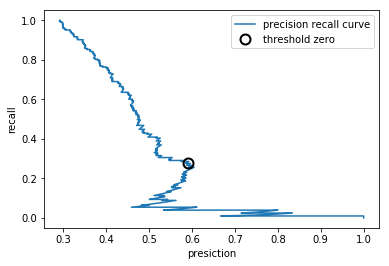

In [60]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test_raw, model.decision_function(X_test_scaled_raw))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin( np.abs(thresholds+0.15) )
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

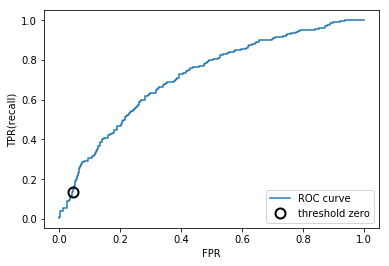

In [46]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_raw, model.decision_function(X_test_scaled_raw))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [47]:
from sklearn.metrics import classification_report

X_pred = model.predict(X_test_scaled_raw)

print(classification_report(y_test_raw, X_pred))

             precision    recall  f1-score   support

          0       0.74      0.96      0.84       527
          1       0.55      0.14      0.22       203

avg / total       0.69      0.73      0.66       730



In [61]:
X_pred_low_thres = model.decision_function(X_test_scaled_raw) >= -0.15

print(classification_report(y_test_raw, X_pred_low_thres))

             precision    recall  f1-score   support

          0       0.77      0.93      0.84       527
          1       0.59      0.28      0.38       203

avg / total       0.72      0.75      0.71       730



In [62]:
print(confusion_matrix(y_test_raw, X_pred_low_thres))

[[488  39]
 [147  56]]


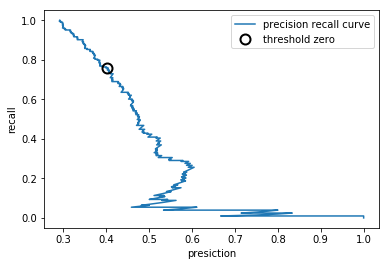

In [63]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test_raw, model.decision_function(X_test_scaled_raw))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin( np.abs(thresholds+0.65) )
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

In [71]:
X_pred_low_thres = model.decision_function(X_test_scaled_raw) >= -0.65

print(classification_report(y_test_raw, X_pred_low_thres))

             precision    recall  f1-score   support

          0       0.86      0.57      0.68       527
          1       0.40      0.76      0.53       203

avg / total       0.73      0.62      0.64       730



In [73]:
X_pred_low_thres = model.decision_function(X_test_scaled_raw) >= -0.67

print(classification_report(y_test_raw, X_pred_low_thres))

             precision    recall  f1-score   support

          0       0.86      0.55      0.67       527
          1       0.39      0.76      0.52       203

avg / total       0.73      0.61      0.63       730



In [36]:
len(data[:-730])

3716

In [39]:
model_tuned = SVC(C=1, gamma=0.01)
model_tuned.fit(X_train_scaled_raw, y_train_raw)

print( model_tuned.score(X_test_scaled_raw, y_test_raw) )

0.7219178082191781


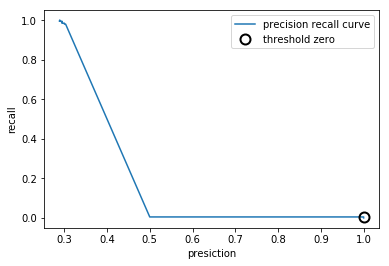

In [41]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test_raw, model_tuned.decision_function(X_test_scaled_raw))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_raw, model.decision_function(X_test_raw))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {
    'svc__C':  [1, 10, 100],
    'svc__gamma': [0.01, 0.1, 1],
}


pipe = make_pipeline(StandardScaler(), SVC())
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train_raw, y_train_raw)

print("test set score: {:.3f}".format(grid_search.score(X_test_raw, y_test_raw)))
print("best params: {}".format(grid_search.best_params_))
print("best cross-validation score: {:.3f}".format(grid_search.best_score_))

test set score: 0.722
best params: {'svc__C': 1, 'svc__gamma': 0.01}
best cross-validation score: 0.694


In [17]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(data, rains, random_state=0)


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train_raw)
X_train_scaled_raw = scaler.transform(X_train_raw)
X_test_scaled_raw = scaler.transform(X_test_raw)

model = SVC()
model.fit(X_train_scaled_raw, y_train_raw)

print( model.score(X_test_scaled_raw, y_test_raw) )

0.7392086330935251


In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test_raw, model.decision_function(X_test_scaled_raw))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_raw, model.decision_function(X_test_scaled_raw))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [20]:
from sklearn.metrics import confusion_matrix
X_pred = model.predict(X_test_scaled_raw)
print(confusion_matrix(y_test_raw, X_pred))

[[753  42]
 [248  69]]


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test_raw, X_pred))

             precision    recall  f1-score   support

          0       0.75      0.95      0.84       795
          1       0.62      0.22      0.32       317

avg / total       0.72      0.74      0.69      1112



741.0

In [13]:
model = SVC(C=1, gamma=0.01)
model.fit(X_train_scaled_raw, y_train_raw)

print( model.score(X_test_scaled_raw, y_test_raw) )

0.7149280575539568


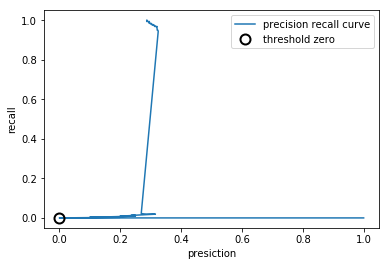

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test_raw, model.decision_function(X_test_scaled_raw))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

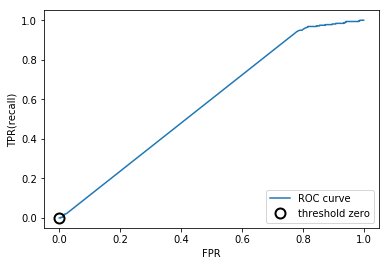

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_raw, model.decision_function(X_test_scaled_raw))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [16]:
from sklearn.metrics import confusion_matrix
X_pred = model.predict(X_test)
print(confusion_matrix(y_test, X_pred))

NameError: name 'X_test' is not defined

In [132]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train_raw, y_train_raw)

print( model.score(X_test_raw, y_test_raw) )

0.7230215827338129


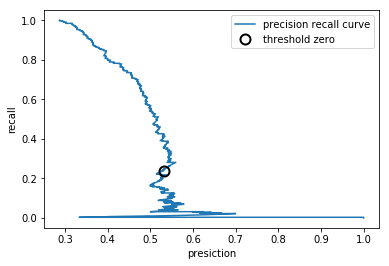

In [133]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test_raw, model.decision_function(X_test_raw))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

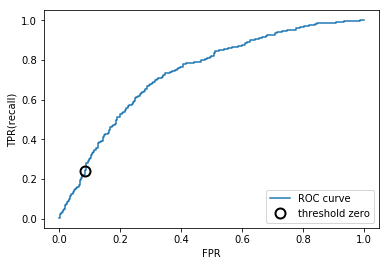

In [134]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_raw, model.decision_function(X_test_raw))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [136]:
from sklearn.metrics import confusion_matrix
X_pred_raw = model.predict(X_test_raw)
print(confusion_matrix(y_test, X_pred_raw))

[[728  67]
 [241  76]]


In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {
    'svc__C':  [0.1, 1, 10, 100, 1000],
    'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
}


pipe = make_pipeline(StandardScaler(), SVC())
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid_search.fit(X_train_raw, y_train_raw)

print("test set score: {:.3f}".format(grid_search.score(X_test_raw, y_test_raw)))
print("best params: {}".format(grid_search.best_params_))
print("best cross-validation score: {:.3f}".format(grid_search.best_score_))

test set score: 0.739
best params: {'svc__C': 1, 'svc__gamma': 0.0001}
best cross-validation score: 0.716


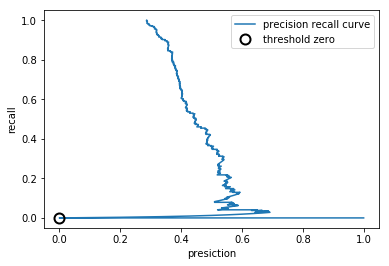

In [125]:
from sklearn.metrics import precision_recall_curve

best_model = grid_search.best_estimator_.named_steps['svc']

precision, recall, thresholds = precision_recall_curve(
    y_test_raw, best_model.decision_function(X_test_raw))

plt.plot(precision, recall, label='precision recall curve')
plt.xlabel('presiction')
plt.ylabel('recall')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=1)

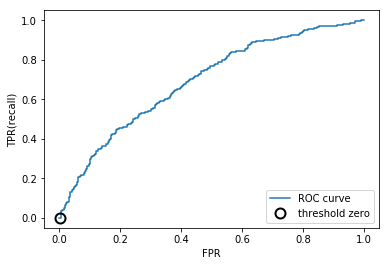

In [126]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_raw, best_model.decision_function(X_test_raw))

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR(recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

In [130]:
from sklearn.metrics import classification_report

X_pred_raw = best_model.predict(X_test_raw)

print(classification_report(y_test_raw, X_pred_raw))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83       795
          1       0.00      0.00      0.00       317

avg / total       0.51      0.71      0.60      1112



/Users/koji/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [131]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, X_pred_raw))

[[795   0]
 [317   0]]
